In [212]:
# Import necessary libraries
import pandas as pd  # Import pandas for data manipulation
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_curve, auc
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score





# Load the downloaded dataset into a pandas DataFrame
# Update the file path to the correct location of the dataset
import os

path = "../stephanie/acaht_prod_fourn_stock.csv"  # Assign the path to the variable 'path'
if os.path.exists(path):
	data = pd.read_csv(path)   # Load the dataset if the file exists
	print("Dataset loaded successfully.")
else:
	print(f"File not found at path: {path}")

Dataset loaded successfully.


In [213]:
data.head()

,id_achat,date_achat,id_produit,quantité,id_fournisseur,prix_unitaire,délai_livraison_jours,montant_total,mois,année,...,marque,prix,stock_minimum,nom_fournisseur,ville,pays,fiabilité,délai_moyen_jours,niveau_stock,entrepot
0,PO000001,2024-03-22,P00627,150,S029,129.62,14,19443.0,3,2024,...,Atelier Minéral,39.95,18,Fontaine Lopes S.A.,Helsinki,Finlande,0.54,6,289,Paris
1,PO000002,2024-06-12,P00469,50,S028,110.81,8,5540.5,6,2024,...,Reflet d'or,25.58,18,Delattre Blot S.A.,Berlin,Allemagne,0.74,8,80,Paris
2,PO000003,2024-01-19,P00849,75,S001,140.58,8,10543.5,1,2024,...,Ãveil Ãlégant,62.78,83,Lecomte et Fils,Zurich,Suisse,0.84,10,54,Marseille
3,PO000004,2024-11-20,P00484,500,S028,120.77,9,60385.0,11,2024,...,Reflet d'or,259.47,39,Delattre Blot S.A.,Berlin,Allemagne,0.74,8,249,Marseille
4,PO000005,2024-06-07,P00196,50,S025,256.05,13,12802.5,6,2024,...,Luxe eclat,353.45,33,Techer SA,Varsovie,Pologne,0.92,12,119,Paris


In [214]:
data.describe()

,quantité,prix_unitaire,délai_livraison_jours,montant_total,mois,année,jour_semaine,prix,stock_minimum,fiabilité,délai_moyen_jours,niveau_stock
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,99.512500,155.187121,7.955900,15530.706135,6.537200,2024.0,2.978200,258.293713,53.283000,0.697760,7.05340,147.771300
std,98.580534,83.661601,3.754273,19313.230160,3.455316,0.0,2.011549,141.211258,25.376137,0.143535,2.19076,88.354962
min,10.000000,10.030000,2.000000,100.300000,1.000000,2024.0,0.000000,22.220000,10.000000,0.500000,3.00000,0.000000
25%,25.000000,83.087500,5.000000,3508.937500,4.000000,2024.0,1.000000,130.720000,31.000000,0.540000,6.00000,72.000000
50%,75.000000,155.365000,8.000000,9099.500000,7.000000,2024.0,3.000000,258.450000,54.000000,0.650000,7.00000,145.000000
75%,100.000000,227.740000,11.000000,19748.062500,10.000000,2024.0,5.000000,376.880000,74.000000,0.740000,8.00000,226.000000
max,500.000000,299.980000,14.000000,148310.000000,12.000000,2024.0,6.000000,499.720000,99.000000,1.000000,14.00000,299.000000


In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_achat               10000 non-null  object 
 1   date_achat             10000 non-null  object 
 2   id_produit             10000 non-null  object 
 3   quantité               10000 non-null  int64  
 4   id_fournisseur         10000 non-null  object 
 5   prix_unitaire          10000 non-null  float64
 6   délai_livraison_jours  10000 non-null  int64  
 7   montant_total          10000 non-null  float64
 8   mois                   10000 non-null  int64  
 9   année                  10000 non-null  int64  
 10  jour_semaine           10000 non-null  int64  
 11  catégorie              10000 non-null  object 
 12  marque                 10000 non-null  object 
 13  prix                   10000 non-null  float64
 14  stock_minimum          10000 non-null  int64  
 15  nom

In [216]:
data.isnull().sum()

id_achat                 0
date_achat               0
id_produit               0
quantité                 0
id_fournisseur           0
prix_unitaire            0
délai_livraison_jours    0
montant_total            0
mois                     0
année                    0
jour_semaine             0
catégorie                0
marque                   0
prix                     0
stock_minimum            0
nom_fournisseur          0
ville                    0
pays                     0
fiabilité                0
délai_moyen_jours        0
niveau_stock             0
entrepot                 0
dtype: int64

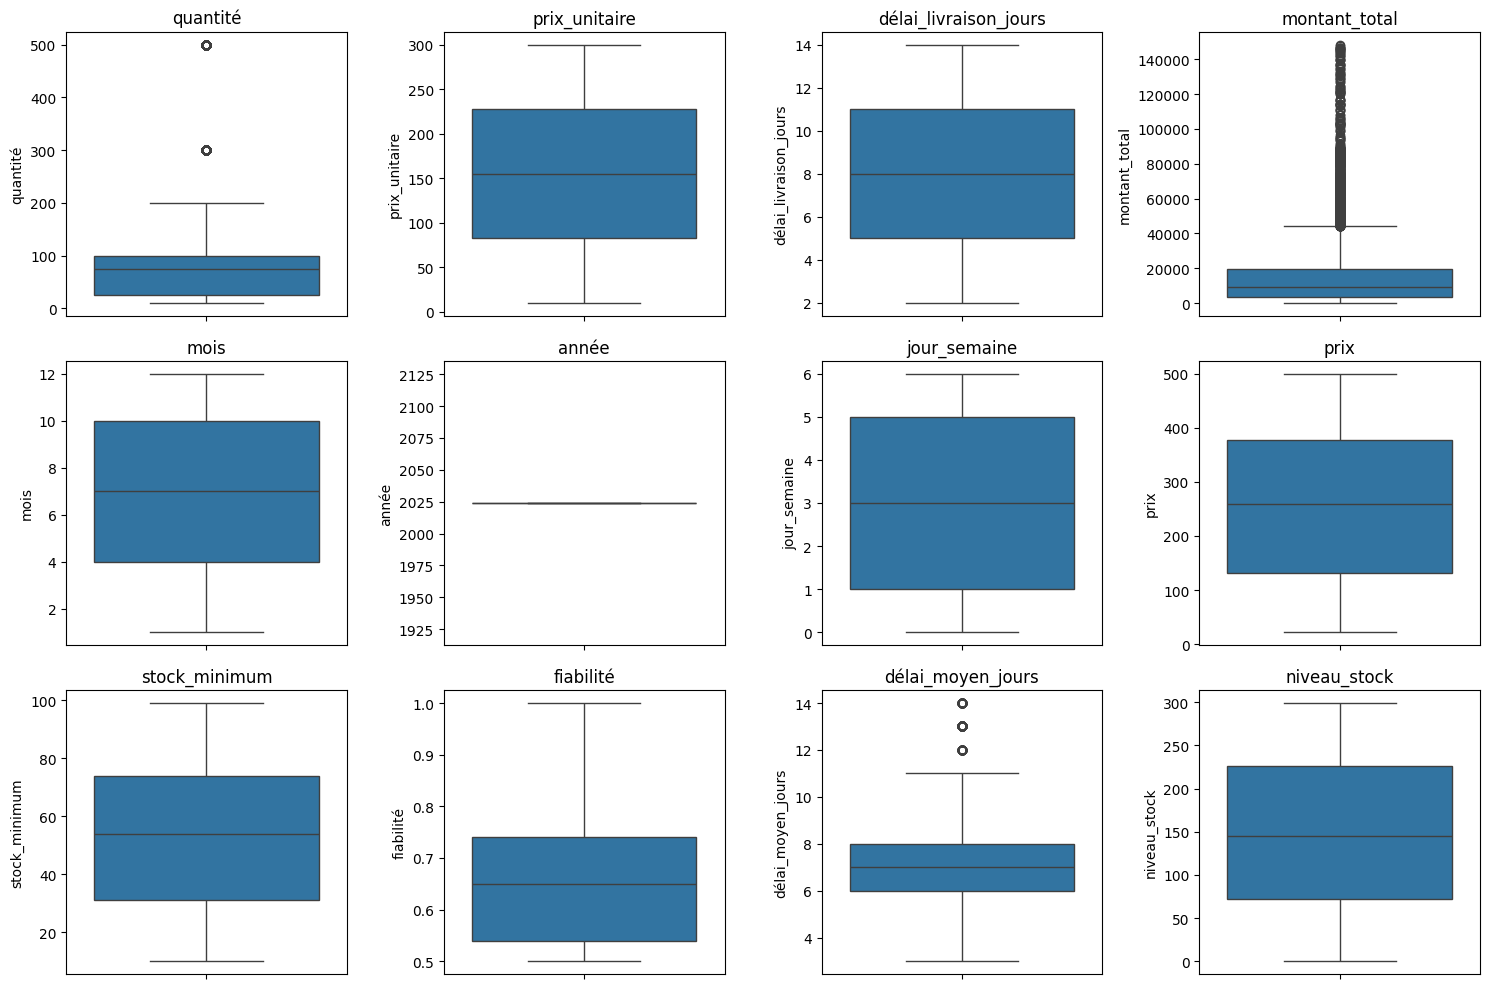

In [217]:
# Créer des box plots pour chaque variable numérique
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)  # Ajustez les dimensions du subplot en fonction du nombre de colonnes
    sns.boxplot(y=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

Les boxplots générés pour chaque variable numérique permettent de visualiser la distribution, la médiane, l'étendue interquartile et la présence de valeurs aberrantes (outliers) pour chaque indicateur du jeu de données. On observe que certaines variables, comme la "quantité" ou le "montant_total", présentent une forte dispersion et plusieurs points extrêmes, ce qui indique la présence de commandes atypiques ou de montants exceptionnellement élevés. D'autres variables, telles que le "niveau_stock" ou la "fiabilité", montrent une distribution plus resserrée, traduisant une gestion plus homogène ou des valeurs généralement proches de la moyenne. Ces visualisations facilitent l'identification rapide des variables nécessitant un traitement particulier (normalisation, gestion des outliers) avant l'entraînement des modèles de machine learning.

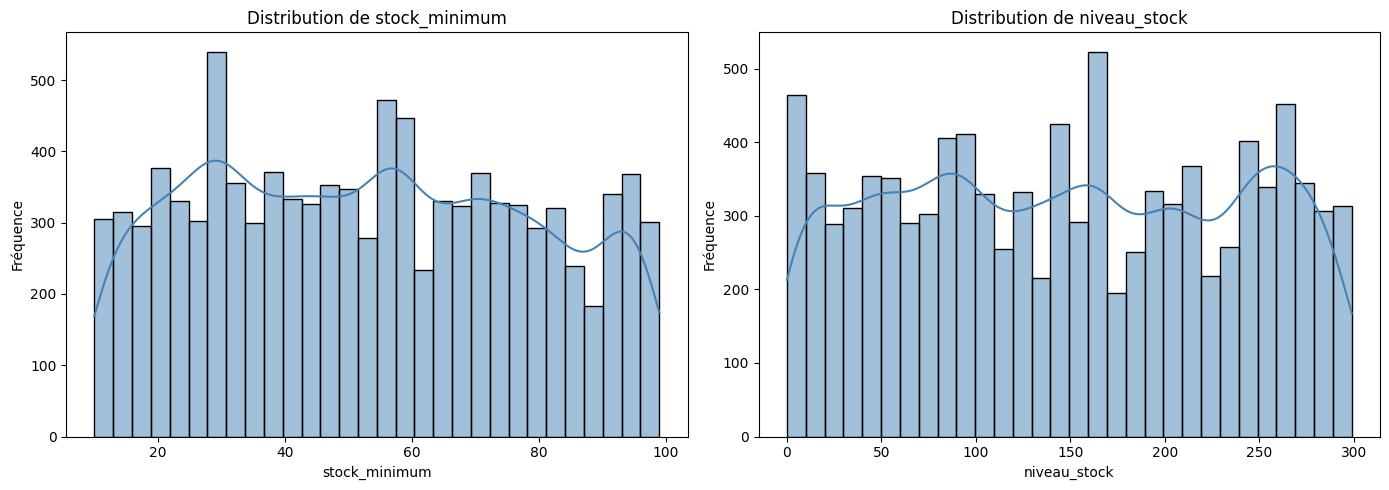

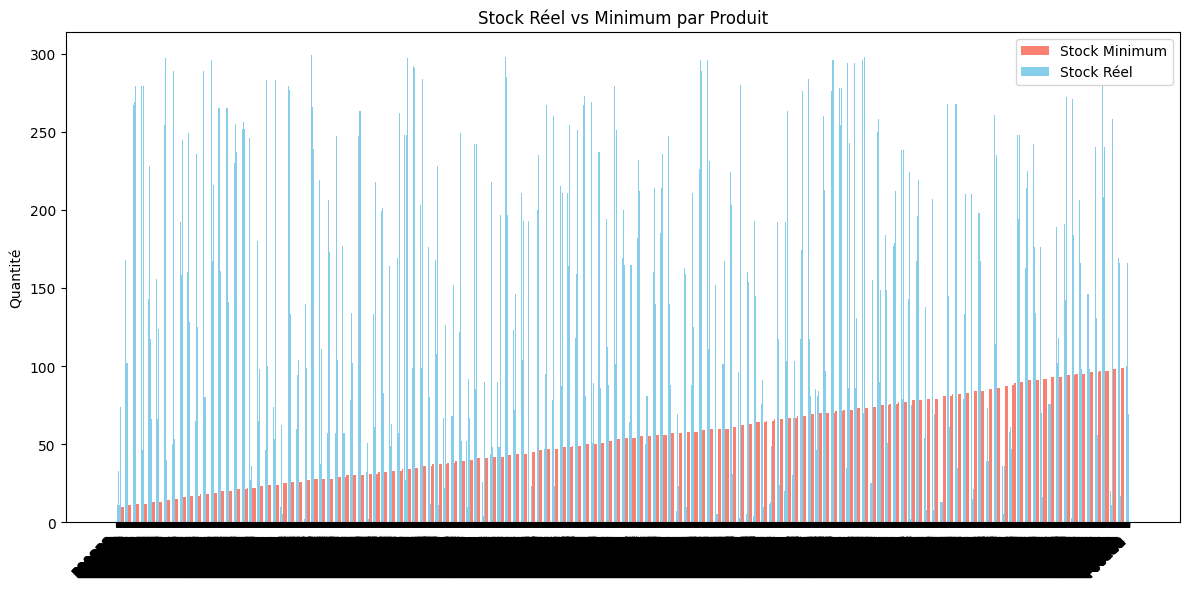

In [218]:
# 🎯 1. Distribution des stocks (minimum & réel)
plt.figure(figsize=(14, 5))

for i, column in enumerate(['stock_minimum', 'niveau_stock'], 1):
    plt.subplot(1, 2, i)
    sns.histplot(data[column], kde=True, bins=30, color='steelblue')
    plt.title(f'Distribution de {column}')
    plt.xlabel(column)
    plt.ylabel("Fréquence")

plt.tight_layout()
plt.show()

# 📊 2. Bar Chart : Stock réel vs Stock minimum par produit
plt.figure(figsize=(12, 6))
data_sorted = data.sort_values('stock_minimum')
bar_width = 0.4
x = range(len(data_sorted))

plt.bar(x, data_sorted['stock_minimum'], width=bar_width, label='Stock Minimum', color='salmon')
plt.bar([p + bar_width for p in x], data_sorted['niveau_stock'], width=bar_width, label='Stock Réel', color='skyblue')

plt.xticks([p + bar_width / 2 for p in x], data_sorted['id_produit'], rotation=45, ha='right')
plt.title('Stock Réel vs Minimum par Produit')
plt.ylabel('Quantité')
plt.legend()
plt.tight_layout()
plt.show()

Le dernier graphique présente la comparaison entre le stock réel et le stock minimum pour chaque produit. On y observe, pour chaque identifiant de produit, deux barres côte à côte : l'une représentant le stock minimum requis, l'autre le niveau de stock réel. Ce visuel permet d'identifier rapidement les produits dont le stock réel est inférieur au minimum requis (situation à risque de rupture) et ceux pour lesquels le stock est largement supérieur au seuil minimum (potentiel surstock). Cette analyse aide à cibler les produits nécessitant un réajustement des commandes ou une optimisation de la gestion des stocks.

/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_78352/501415501.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ville_montant, x='ville', y='montant_total', palette='Blues_d')


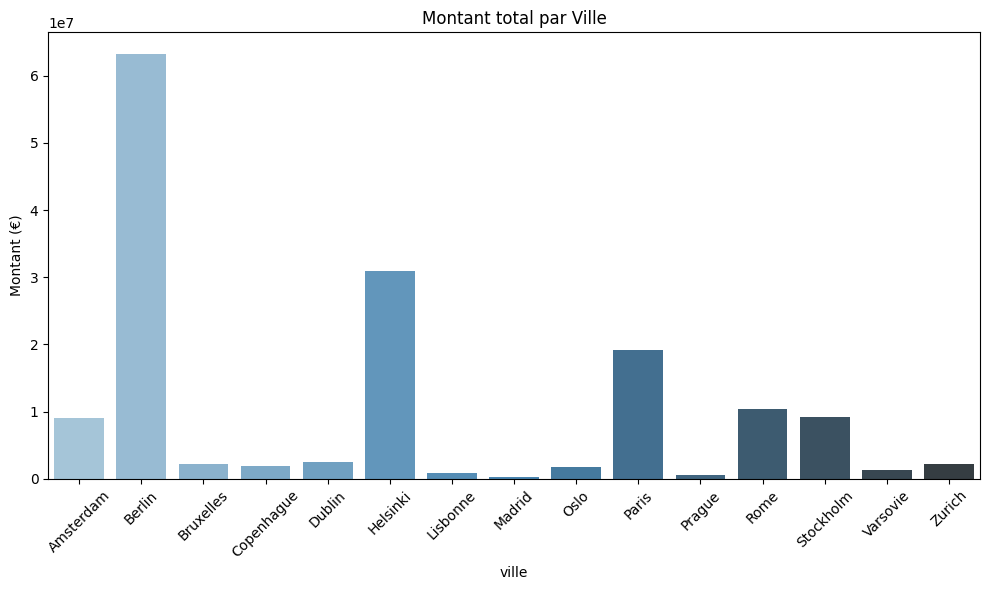

In [219]:
# 🏙️ 4. Bar Chart : Ville vs Montant total
plt.figure(figsize=(10, 6))
ville_montant = data.groupby('ville')['montant_total'].sum().reset_index()
sns.barplot(data=ville_montant, x='ville', y='montant_total', palette='Blues_d')
plt.title('Montant total par Ville')
plt.xticks(rotation=45)
plt.ylabel('Montant (€)')
plt.tight_layout()
plt.show()


Le graphique "Montant total par Ville" présente la somme des montants d’achats réalisés dans chaque ville. On observe que certaines villes, comme Berlin et Paris, se distinguent par des volumes d’achats nettement supérieurs aux autres, ce qui peut refléter une activité commerciale plus intense ou la présence de plus grands entrepôts/distributeurs dans ces localisations. À l’inverse, des villes comme Madrid ou Prague affichent des montants beaucoup plus faibles, suggérant une activité moindre ou un rôle plus secondaire dans la chaîne d’approvisionnement. Ce graphique permet ainsi d’identifier les pôles majeurs d’achats et d’orienter les analyses futures sur les facteurs expliquant ces disparités (taille du marché, nombre de points de vente, politiques d’approvisionnement, etc.).

/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_78352/620272134.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=quantite_par_fournisseur, x='nom_fournisseur', y='quantité', palette='Blues_d')


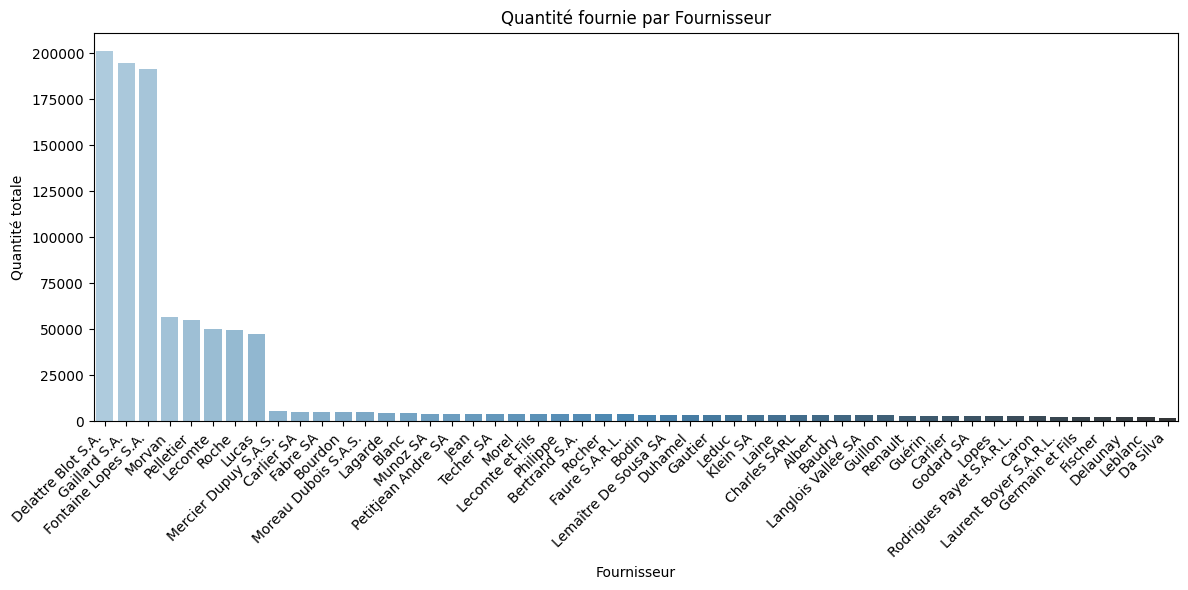

In [221]:
# Regrouper les quantités par fournisseur
quantite_par_fournisseur = data.groupby('nom_fournisseur')['quantité'].sum().reset_index()

# Trier du plus grand au plus petit
quantite_par_fournisseur = quantite_par_fournisseur.sort_values(by='quantité', ascending=False)

# Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(data=quantite_par_fournisseur, x='nom_fournisseur', y='quantité', palette='Blues_d')
plt.title('Quantité fournie par Fournisseur')
plt.xlabel('Fournisseur')
plt.ylabel('Quantité totale')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

 Le graphique "Quantité fournie par Fournisseur" présente la quantité totale livrée par chaque fournisseur sur la période étudiée.
#On observe que certains fournisseurs, comme "Delattre Blot S.A.", "Gaillard S.A." et "Fontaine Lopes S.A.", se distinguent nettement par des volumes livrés très élevés, ce qui traduit une forte dépendance vis-à-vis de ces partenaires.
#À l'inverse, de nombreux fournisseurs affichent des quantités bien plus faibles, illustrant une structure de marché en "longue traîne" où quelques acteurs principaux concentrent la majorité des volumes.
 Ce graphique permet d'identifier les fournisseurs stratégiques, de surveiller les risques liés à la concentration des approvisionnements, et d'envisager des actions de diversification ou de renforcement des relations avec les partenaires clés.

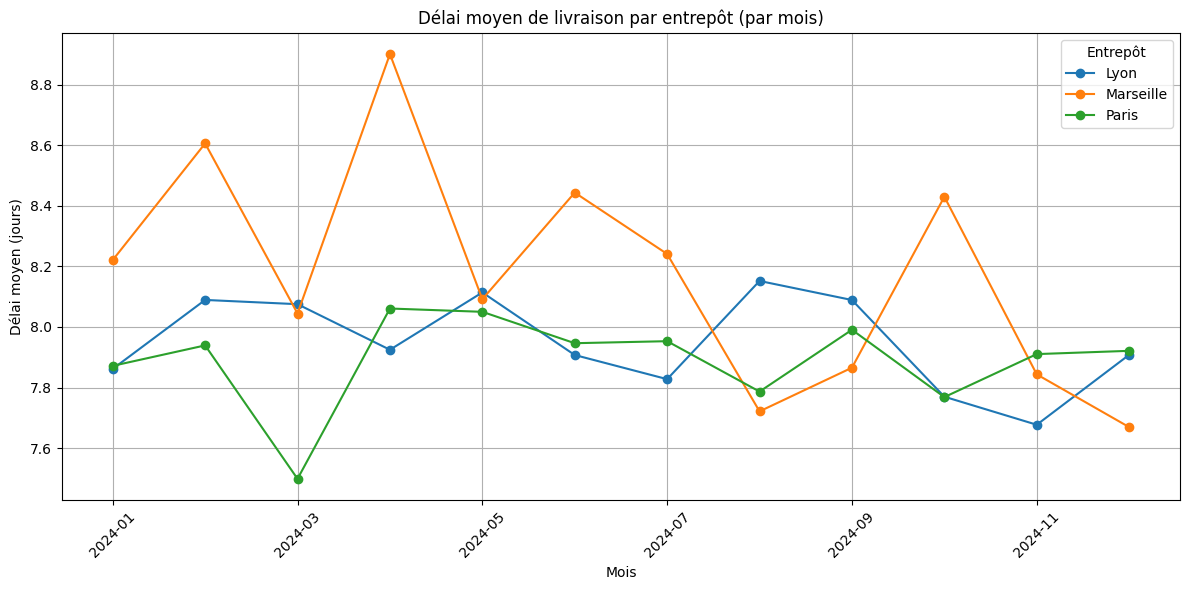

In [222]:
# Créer une colonne 'date' au format AAAA-MM pour grouper par mois
# Clean the 'date_achat' column by replacing invalid dates with NaT
data['date_achat'] = pd.to_datetime(data['date_achat'], errors='coerce', format='%Y-%m-%d')

# Drop rows with invalid dates
data = data.dropna(subset=['date_achat'])

# Create a 'mois_complet' column in the format YYYY-MM for grouping by month
data['mois_complet'] = data['date_achat'].dt.to_period('M').astype(str)

# Grouper par mois + entrepôt et calculer la moyenne du délai de livraison
delai_mensuel = data.groupby(['mois_complet', 'entrepot'])['délai_livraison_jours'].mean().reset_index()

# Pivot pour créer une colonne par entrepôt (utile pour matplotlib)
pivot = delai_mensuel.pivot(index='mois_complet', columns='entrepot', values='délai_livraison_jours')

# Tracer
pivot.plot(marker='o', figsize=(12, 6))
plt.title("Délai moyen de livraison par entrepôt (par mois)")
plt.xlabel("Mois")
plt.ylabel("Délai moyen (jours)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title="Entrepôt")
plt.show()


Ce graphique montre l'évolution du délai moyen de livraison pour chaque entrepôt au fil des mois.
Chaque courbe représente un entrepôt (Lyon, Marseille, Paris) et permet de visualiser les variations saisonnières ou ponctuelles des délais.
On observe que les délais restent globalement stables, mais certaines fluctuations peuvent indiquer des périodes de tension logistique ou d'amélioration des performances.
Ce suivi aide à identifier les entrepôts les plus performants et à cibler les périodes nécessitant une attention particulière pour optimiser la chaîne d'approvisionnement.

In [223]:
print(data.columns)


Index(['id_achat', 'date_achat', 'id_produit', 'quantité', 'id_fournisseur',
       'prix_unitaire', 'délai_livraison_jours', 'montant_total', 'mois',
       'année', 'jour_semaine', 'catégorie', 'marque', 'prix', 'stock_minimum',
       'nom_fournisseur', 'ville', 'pays', 'fiabilité', 'délai_moyen_jours',
       'niveau_stock', 'entrepot', 'mois_complet'],
      dtype='object')


In [224]:
# Fonction pour calculer le HHI
def calculate_hhi(series):
    shares = series / series.sum()
    hhi = (shares ** 2).sum() * 10000  # HHI est souvent multiplié par 10,000 pour lisibilité
    return hhi

# HHI par produit
quantities_by_product = data.groupby('id_produit')['quantité'].sum()
hhi_product = calculate_hhi(quantities_by_product)

# HHI par fournisseur
quantities_by_supplier = data.groupby('id_fournisseur')['quantité'].sum()
hhi_supplier = calculate_hhi(quantities_by_supplier)

hhi_product, hhi_supplier

(np.float64(11.995859793884964), np.float64(1301.5112906041243))



HHI par produit : 12.0 → très faible concentration → les achats sont très bien répartis entre les produits.
HHI par fournisseur : 1301.5 → concentration modérée → certains fournisseurs livrent davantage que d'autres, mais aucun ne domine totalement.

/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_78352/1811700647.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hhi_data, x='Catégorie', y='HHI', palette='viridis')


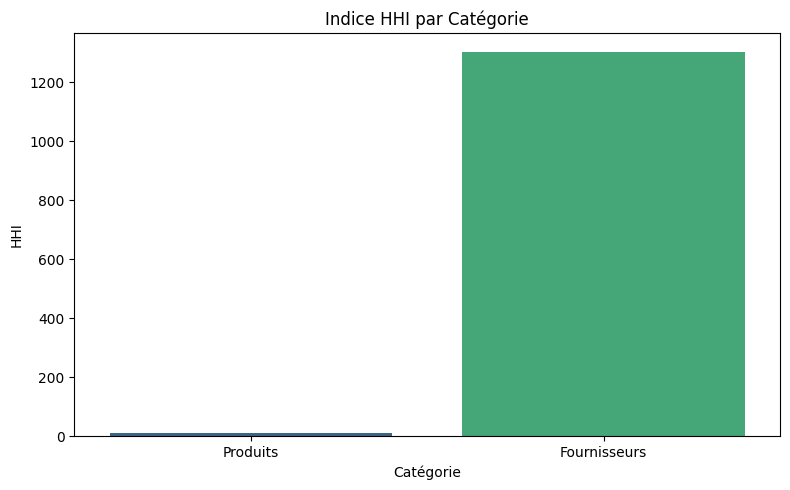

In [225]:
# Visualisation des indices HHI

# Créer un DataFrame pour les HHI
hhi_data = pd.DataFrame({
    'Catégorie': ['Produits', 'Fournisseurs'],
    'HHI': [hhi_product, hhi_supplier]
})

# Tracer un graphique en barres
plt.figure(figsize=(8, 5))
sns.barplot(data=hhi_data, x='Catégorie', y='HHI', palette='viridis')
plt.title('Indice HHI par Catégorie')
plt.ylabel('HHI')
plt.xlabel('Catégorie')
plt.tight_layout()
plt.show()

Le graphique HHI (Herfindahl-Hirschman Index) compare la concentration des achats entre deux catégories : produits et fournisseurs. On observe que l'indice HHI pour les produits est très faible, ce qui indique une répartition très équilibrée des achats entre les différents produits (pas de dépendance forte à un seul produit). À l'inverse, l'indice HHI pour les fournisseurs est nettement plus élevé, signalant une concentration modérée : certains fournisseurs livrent des volumes bien supérieurs aux autres. Cela signifie qu'il existe un risque de dépendance vis-à-vis de quelques fournisseurs majeurs, ce qui peut fragiliser la chaîne d'approvisionnement en cas de défaillance de ces partenaires. Il est donc recommandé de surveiller cette concentration et, si possible, de diversifier davantage les sources d'approvisionnement pour renforcer la résilience logistique.

commente graphique hh1

/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_78352/4218800721.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rotation_par_categorie, x='catégorie', y='rotation_stock', palette='viridis')


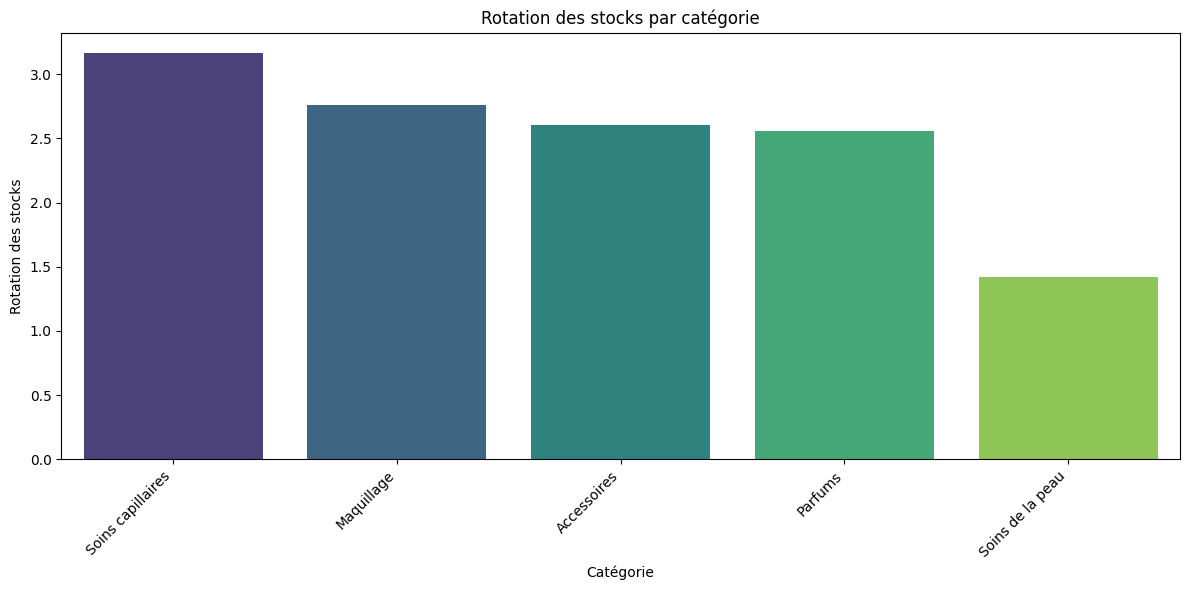

In [226]:
# Créer la colonne rotation_stock si elle n'existe pas
if 'rotation_stock' not in data.columns:
	# Exemple de calcul : quantité / niveau_stock (évite la division par zéro)
	data['rotation_stock'] = data['quantité'] / data['niveau_stock'].replace(0, np.nan)

# Calculer la rotation moyenne des stocks par catégorie
rotation_par_categorie = data.groupby('catégorie')['rotation_stock'].mean().reset_index()

# Trier les catégories par rotation moyenne décroissante
rotation_par_categorie = rotation_par_categorie.sort_values(by='rotation_stock', ascending=False)

# Visualiser la rotation des stocks par catégorie
plt.figure(figsize=(12, 6))
sns.barplot(data=rotation_par_categorie, x='catégorie', y='rotation_stock', palette='viridis')
plt.title('Rotation des stocks par catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Rotation des stocks')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Le dernier visuel montre la rotation des stocks par catégorie sous forme de graphique en barres. Il met en évidence les catégories ayant les rotations les plus élevées, ce qui indique une fréquence de renouvellement rapide des stocks pour ces catégories. Par exemple, les "Soins capillaires" et le "Maquillage" ont les rotations les plus élevées, ce qui peut refléter une forte demande ou une gestion efficace des stocks. À l'inverse, les catégories avec une rotation plus faible, comme les "Soins de la peau", pourraient nécessiter une analyse pour optimiser leur gestion ou mieux comprendre leur demande.

Taux de satisfaction global : 20.22%


/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_78352/2970179939.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=satisfaction_par_fournisseur, x='nom_fournisseur', y='satisfaction', palette='coolwarm')


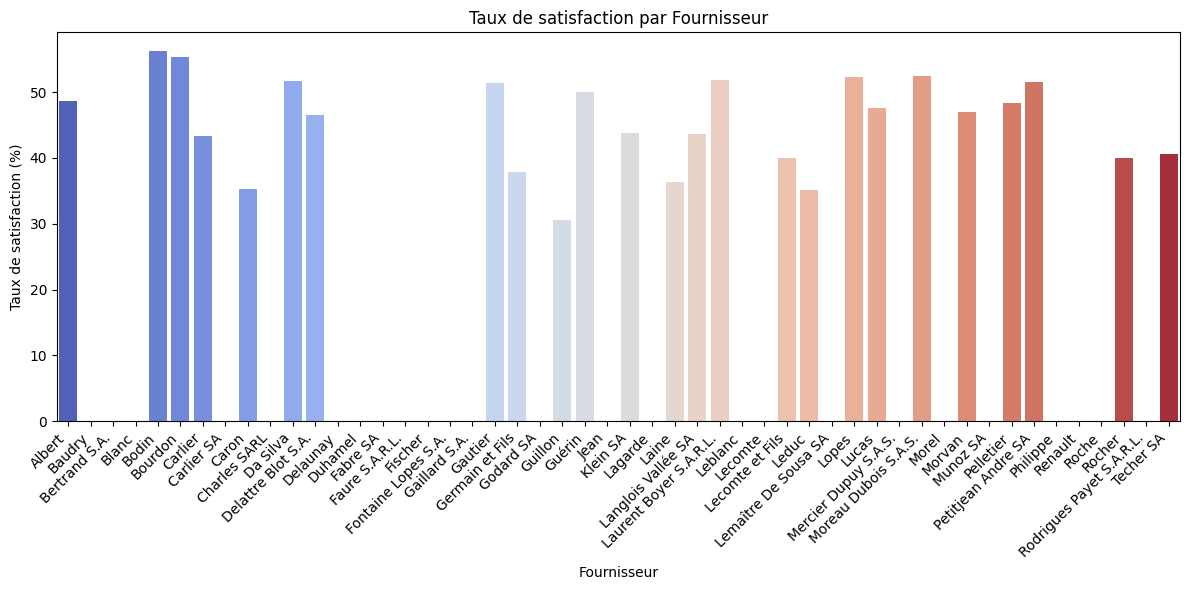

In [227]:
# Calculer le taux de satisfaction des commandes
# Une commande est considérée comme satisfaisante si le délai de livraison est inférieur ou égal à la moyenne et si la fiabilité est supérieure à un seuil (par exemple, 0.7)
seuil_fiabilite = 0.7
delai_moyen = data['délai_livraison_jours'].mean()

data['satisfaction'] = ((data['délai_livraison_jours'] <= delai_moyen) & (data['fiabilité'] > seuil_fiabilite)).astype(int)

# Calculer le taux de satisfaction global
taux_satisfaction = data['satisfaction'].mean() * 100
print(f"Taux de satisfaction global : {taux_satisfaction:.2f}%")

# Visualiser le taux de satisfaction par fournisseur
satisfaction_par_fournisseur = data.groupby('nom_fournisseur')['satisfaction'].mean().reset_index()
satisfaction_par_fournisseur['satisfaction'] *= 100

plt.figure(figsize=(12, 6))
sns.barplot(data=satisfaction_par_fournisseur, x='nom_fournisseur', y='satisfaction', palette='coolwarm')
plt.title('Taux de satisfaction par Fournisseur')
plt.xlabel('Fournisseur')
plt.ylabel('Taux de satisfaction (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Le visuel montre le taux de satisfaction par fournisseur sous forme de graphique en barres. Il met en évidence les fournisseurs ayant les taux de satisfaction les plus élevés, ce qui reflète une meilleure performance en termes de fiabilité et de respect des délais de livraison. Par exemple, certains fournisseurs comme "Bodin" et "Bourdon" affichent des taux de satisfaction supérieurs à 50 %, ce qui indique une bonne gestion de leurs commandes. En revanche, plusieurs fournisseurs ont un taux de satisfaction nul, ce qui peut signaler des problèmes récurrents dans leurs performances. Ce graphique permet d'identifier les partenaires fiables et ceux nécessitant une amélioration.

/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_78352/64781939.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resilience_par_fournisseur, x='nom_fournisseur', y='score_resilience', palette='coolwarm')


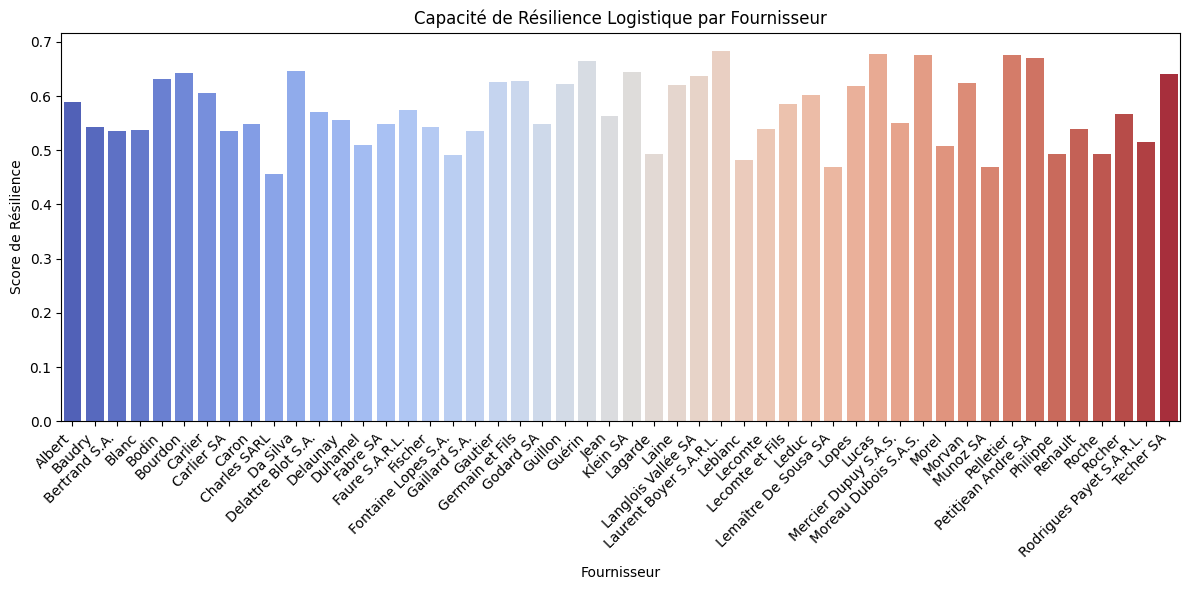

In [228]:
# Définir les pondérations pour chaque indicateur
poids_fiabilite = 0.4
poids_delai = 0.3
poids_stock = 0.3

# Normaliser les indicateurs entre 0 et 1
data['fiabilite_norm'] = data['fiabilité'] / data['fiabilité'].max()
data['delai_norm'] = 1 - (data['délai_livraison_jours'] / data['délai_livraison_jours'].max())
data['stock_norm'] = data['niveau_stock'] / data['niveau_stock'].max()

# Calculer le score de résilience pour chaque ligne
data['score_resilience'] = (
    poids_fiabilite * data['fiabilite_norm'] +
    poids_delai * data['delai_norm'] +
    poids_stock * data['stock_norm']
)

# Calculer la résilience moyenne par fournisseur
resilience_par_fournisseur = data.groupby('nom_fournisseur')['score_resilience'].mean().reset_index()

# Visualiser la résilience par fournisseur
plt.figure(figsize=(12, 6))
sns.barplot(data=resilience_par_fournisseur, x='nom_fournisseur', y='score_resilience', palette='coolwarm')
plt.title('Capacité de Résilience Logistique par Fournisseur')
plt.xlabel('Fournisseur')
plt.ylabel('Score de Résilience')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Le dernier visuel illustre la capacité de résilience logistique par fournisseur sous forme de graphique en barres. Il met en évidence les fournisseurs ayant les scores de résilience les plus élevés, reflétant une meilleure performance globale en termes de fiabilité, délais de livraison et gestion des stocks. Par exemple, des fournisseurs comme "Laurent Boyer S.A.R.L." et "Lucas" affichent des scores de résilience supérieurs à 0.67, ce qui indique une gestion logistique efficace. En revanche, certains fournisseurs comme "Leblanc" et "Lagarde" ont des scores plus faibles, suggérant des opportunités d'amélioration dans leur chaîne logistique. Ce graphique permet d'identifier les partenaires les plus performants et ceux nécessitant une attention particulière pour optimiser la résilience globale.

Les Insectes sontarrivées 

In [229]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_achat               10000 non-null  object        
 1   date_achat             10000 non-null  datetime64[ns]
 2   id_produit             10000 non-null  object        
 3   quantité               10000 non-null  int64         
 4   id_fournisseur         10000 non-null  object        
 5   prix_unitaire          10000 non-null  float64       
 6   délai_livraison_jours  10000 non-null  int64         
 7   montant_total          10000 non-null  float64       
 8   mois                   10000 non-null  int64         
 9   année                  10000 non-null  int64         
 10  jour_semaine           10000 non-null  int64         
 11  catégorie              10000 non-null  object        
 12  marque                 10000 non-null  object        
 13  pr

In [230]:
# Afficher les résultats standardisés (X_scaled) sous forme de DataFrame pour une meilleure lisibilité
pd.DataFrame(X_scaled, columns=X_clean.columns).head()

ValueError: Shape of passed values is (10000, 17), indices imply (10000, 15)

In [ ]:
# Split en train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [ ]:
# Modèle 1 : Régression logistique
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
y_proba_logreg = logreg.predict_proba(X_test)[:, 1]

# Modèle 2 : Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

In [ ]:
# Métriques de performance
results = {
    "Logistic Regression": {
        "Accuracy": accuracy_score(y_test, y_pred_logreg),
        "AUC": roc_auc_score(y_test, y_proba_logreg),
        "Confusion Matrix": confusion_matrix(y_test, y_pred_logreg)
    },
    "Random Forest": {
        "Accuracy": accuracy_score(y_test, y_pred_rf),
        "AUC": roc_auc_score(y_test, y_proba_rf),
        "Confusion Matrix": confusion_matrix(y_test, y_pred_rf)
    }
}

In [ ]:
# Courbe ROC
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_proba_logreg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

In [ ]:
# Vérification d'un problème de fuite de données ou de target leakage

# 1. Vérifier si la variable cible (delai_court ou délai_livraison_jours) est présente dans X
print("Colonnes de X :", X.columns.tolist())

# 2. Vérifier la corrélation entre les features et la cible
corrs = pd.DataFrame(X, columns=X.columns).corrwith(y)
print("Corrélation entre les features et la cible :\n", corrs.sort_values(ascending=False))

# 3. Vérifier si une variable fortement corrélée ou identique à la cible est dans X
# Par exemple, 'délai_livraison_jours' ou une variable dérivée

# 4. Solution : S'assurer que ni 'délai_livraison_jours' ni toute variable dérivée de la cible n'est dans X
# (Déjà fait dans la cellule 30, mais à revérifier)
if 'délai_livraison_jours' in X.columns:
    print("⚠️ La variable 'délai_livraison_jours' est dans X, il faut la retirer !")
if 'delai_court' in X.columns:
    print("⚠️ La variable 'delai_court' est dans X, il faut la retirer !")

# 5. Refaire le split et l'entraînement sans fuite de données
# (Reprendre à partir de la cellule 30 si besoin, en s'assurant que la cible et ses dérivées ne sont pas dans X)

# 6. Vérifier la distribution de la cible (pour s'assurer qu'il n'y a pas de problème de déséquilibre extrême)
print("Distribution de la cible :\n", y.value_counts(normalize=True))

# Si tout est correct, relancer l'entraînement et vérifier les scores.

Colonnes de X : ['id_achat', 'quantité', 'id_fournisseur', 'prix_unitaire', 'délai_livraison_jours', 'montant_total', 'mois', 'année', 'jour_semaine', 'catégorie', 'marque', 'prix', 'stock_minimum', 'fiabilité', 'délai_moyen_jours', 'niveau_stock', 'entrepot']
Corrélation entre les features et la cible :
 catégorie                0.018002
mois                     0.014065
entrepot                 0.011425
fiabilité                0.011097
stock_minimum            0.006320
prix                     0.005875
délai_moyen_jours        0.005439
jour_semaine             0.002062
niveau_stock            -0.002591
quantité                -0.004413
id_fournisseur          -0.009960
montant_total           -0.011511
prix_unitaire           -0.011532
id_achat                -0.015053
marque                  -0.016003
délai_livraison_jours   -0.867268
année                         NaN
dtype: float64
⚠️ La variable 'délai_livraison_jours' est dans X, il faut la retirer !
Distribution de la cible :
 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

# ⚠️ Diagnostic : ROC AUC et accuracy à 1 → fuite de données probable !
# Vérifions si une variable liée à la cible (comme 'délai_livraison_jours' ou 'délai_moyen_jours') est dans X

print("Colonnes de X :", X.columns.tolist())

# On retire toute variable liée à la cible
cols_to_remove = [col for col in X.columns if 'delai' in col or 'délai' in col]
print("Colonnes à retirer pour éviter la fuite :", cols_to_remove)
X_clean = X.drop(columns=cols_to_remove, errors='ignore')

# On refait le scaling et le split
X_scaled_clean = scaler.fit_transform(X_clean)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_clean, y, test_size=0.25, random_state=42)

# Réentraînement des modèles
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
y_proba_logreg = logreg.predict_proba(X_test)[:, 1]

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Nouvelles métriques

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Logistic Regression ROC AUC:", roc_auc_score(y_test, y_proba_logreg))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest ROC AUC:", roc_auc_score(y_test, y_proba_rf))
print("Confusion Matrix (LogReg):\n", confusion_matrix(y_test, y_pred_logreg))
print("Confusion Matrix (RF):\n", confusion_matrix(y_test, y_pred_rf))

Colonnes de X : ['id_achat', 'quantité', 'id_fournisseur', 'prix_unitaire', 'délai_livraison_jours', 'montant_total', 'mois', 'année', 'jour_semaine', 'catégorie', 'marque', 'prix', 'stock_minimum', 'fiabilité', 'délai_moyen_jours', 'niveau_stock', 'entrepot']
Colonnes à retirer pour éviter la fuite : ['délai_livraison_jours', 'délai_moyen_jours']
Logistic Regression Accuracy: 0.55
Logistic Regression ROC AUC: 0.48718915406894076
Random Forest Accuracy: 0.512
Random Forest ROC AUC: 0.5027511269774332
Confusion Matrix (LogReg):
 [[  69 1044]
 [  81 1306]]
Confusion Matrix (RF):
 [[387 726]
 [494 893]]


Données manquantes par colonne :
id_achat          0
quantité          0
id_fournisseur    0
prix_unitaire     0
montant_total     0
mois              0
année             0
jour_semaine      0
catégorie         0
marque            0
prix              0
stock_minimum     0
fiabilité         0
niveau_stock      0
entrepot          0
dtype: int64

Statistiques descriptives :
          id_achat      quantité  id_fournisseur  prix_unitaire  \
count  10000.00000  10000.000000    10000.000000   10000.000000   
mean    4999.50000     99.512500       21.704900     155.187121   
std     2886.89568     98.580534       13.483464      83.661601   
min        0.00000     10.000000        0.000000      10.030000   
25%     2499.75000     25.000000        7.000000      83.087500   
50%     4999.50000     75.000000       27.000000     155.365000   
75%     7499.25000    100.000000       28.000000     227.740000   
max     9999.00000    500.000000       49.000000     299.980000   

       montant_total 

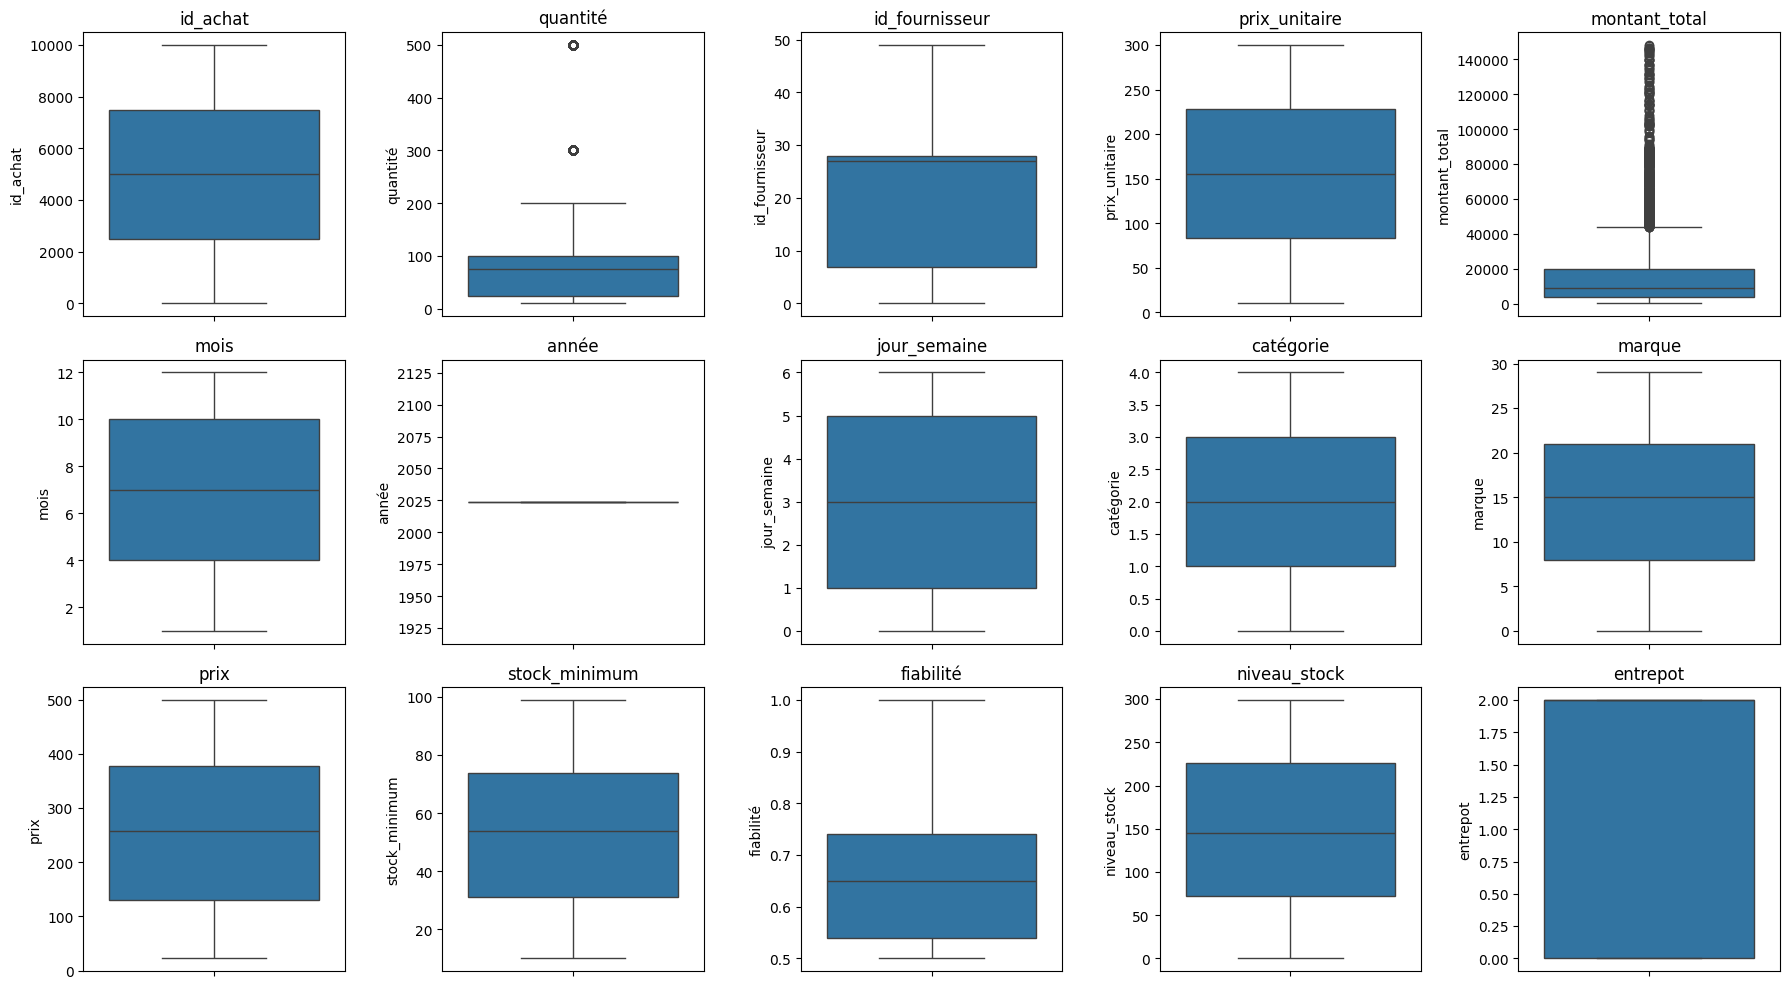

In [ ]:


# Vérification des données manquantes, du bruit, des erreurs ou des valeurs aberrantes dans X_clean

# 1. Données manquantes
print("Données manquantes par colonne :")
print(X_clean.isnull().sum())

# 2. Statistiques descriptives pour détecter le bruit ou les valeurs aberrantes
print("\nStatistiques descriptives :")
print(X_clean.describe())

# 3. Détection simple de valeurs aberrantes (exemple : valeurs extrêmes pour chaque variable numérique)
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 10))
for idx, col in enumerate(X_clean.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(3, 5, idx)
    sns.boxplot(y=X_clean[col])
    plt.title(col)
plt.tight_layout()
plt.show()

La cellule précédente applique la technique SMOTE pour équilibrer les classes de la variable cible `delai_court`. On observe que la distribution des classes après sur-échantillonnage est désormais parfaitement équilibrée, ce qui permet d'entraîner des modèles de classification plus robustes et moins biaisés par le déséquilibre initial. Cette étape est essentielle pour améliorer la capacité de généralisation des modèles, notamment dans le cas de classes minoritaires sous-représentées dans les données d'origine.

In [ ]:


# Vérifier l'équilibre des classes
print("Distribution de la cible (delai_court) :")
print(y.value_counts(normalize=True))

# Aligner X_clean et y pour éviter les erreurs de taille
common_idx = X_clean.index.intersection(y.index)
X_clean_aligned = X_clean.loc[common_idx]
y_aligned = y.loc[common_idx]

# Si déséquilibre, appliquer SMOTE pour équilibrer les classes

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_clean_aligned, y_aligned)

print("Nouvelle distribution après SMOTE :")
print(pd.Series(y_resampled).value_counts(normalize=True))

Distribution de la cible (delai_court) :
quantité
50     0.197615
25     0.156829
100    0.153923
75     0.144804
150    0.098106
10     0.097104
200    0.072051
300    0.051809
500    0.027758
Name: proportion, dtype: float64
Nouvelle distribution après SMOTE :
quantité
150    0.111111
50     0.111111
75     0.111111
500    0.111111
100    0.111111
200    0.111111
25     0.111111
10     0.111111
300    0.111111
Name: proportion, dtype: float64


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Vérifier la distribution initiale
print("Distribution initiale :", y.value_counts())

# Appliquer le sous-échantillonnage aléatoire
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X_clean, y)

# Vérifier la nouvelle distribution
print("Distribution après sous-échantillonnage :", pd.Series(y_under).value_counts())

Distribution initiale : delai_court
1    5443
0    4557
Name: count, dtype: int64
Distribution après sous-échantillonnage : delai_court
0    4557
1    4557
Name: count, dtype: int64


In [ ]:
# Ajout de nouvelles features pertinentes sur X_resampled

X_feat = X_resampled.copy()

# 1. Transformation logarithmique sur les variables à forte dispersion
for col in ['quantité', 'prix_unitaire', 'montant_total', 'prix', 'niveau_stock']:
    X_feat[f'log_{col}'] = np.log1p(X_feat[col])

# 2. Binning : création de catégories pour certaines variables continues
X_feat['quantite_bin'] = pd.cut(X_feat['quantité'], bins=[0, 50, 100, 200, 500, np.inf], labels=False)
X_feat['prix_unitaire_bin'] = pd.cut(X_feat['prix_unitaire'], bins=5, labels=False)
X_feat['fiabilite_bin'] = pd.cut(X_feat['fiabilité'], bins=[0, 0.6, 0.8, 1.0], labels=False)

# 3. Interaction features
X_feat['qte_x_fiabilite'] = X_feat['quantité'] * X_feat['fiabilité']
X_feat['stock_ratio'] = X_feat['niveau_stock'] / (X_feat['stock_minimum'] + 1)  # +1 pour éviter division par zéro

# 4. Variable booléenne : stock critique (niveau_stock < stock_minimum)
X_feat['stock_critique'] = (X_feat['niveau_stock'] < X_feat['stock_minimum']).astype(int)

# 5. Variable saisonnalité : mois haute saison (ex: été = 6,7,8)
X_feat['haute_saison'] = X_feat['mois'].isin([6, 7, 8]).astype(int)

# Afficher les nouvelles colonnes ajoutées
X_feat.head()

,id_achat,quantité,id_fournisseur,prix_unitaire,montant_total,mois,année,jour_semaine,catégorie,marque,...,log_montant_total,log_prix,log_niveau_stock,quantite_bin,prix_unitaire_bin,fiabilite_bin,qte_x_fiabilite,stock_ratio,stock_critique,haute_saison
0,0,150,28,129.62,19443.0,3,2024,4,3,1,...,9.875294,3.712352,5.669881,2,2,0,81.0,15.210526,0,0
1,1,50,27,110.81,5540.5,6,2024,2,4,21,...,8.620021,3.280159,4.394449,0,1,1,37.0,4.210526,0,1
2,2,75,0,140.58,10543.5,1,2024,4,4,29,...,9.263360,4.155440,4.007333,1,2,2,63.0,0.642857,1,0
3,3,500,27,120.77,60385.0,11,2024,2,0,21,...,11.008513,5.562488,5.521461,3,1,1,370.0,6.225000,0,0
4,4,50,24,256.05,12802.5,6,2024,4,1,15,...,9.457474,5.870567,4.787492,0,4,2,46.0,3.500000,0,1


In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Exemple : suppose que tu as un DataFrame X et une cible y
# X, y = tes données ici

# Séparation train/test (au cas où tu ne l'as pas encore fait)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définition de la grille des hyperparamètres
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']  # ⚠️ PAS "auto"
}

# Création du modèle
rf = RandomForestClassifier(random_state=42)

# GridSearchCV avec validation croisée
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    error_score='raise',  # Pour lever les erreurs au lieu de mettre NaN
    n_jobs=-1,             # Utilise tous les cœurs disponibles
    verbose=2              # Affiche les infos d'entraînement
)

# Exécution de la recherche
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres et du score
print("Meilleurs hyperparamètres :", grid_search.best_params_)
print("Meilleur score ROC AUC :", grid_search.best_score_)

# Test sur données de test (si tu veux)
best_model = grid_search.best_estimator_
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
print("ROC AUC sur test :", roc_auc_score(y_test, y_pred_proba))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2,

In [232]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [233]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_rs, y_train_rs)
y_pred_gb = gb.predict(X_test_rs)
y_proba_gb = gb.predict_proba(X_test_rs)[:, 1]

print("Gradient Boosting Accuracy:", accuracy_score(y_test_rs, y_pred_gb))
print("Gradient Boosting ROC AUC:", roc_auc_score(y_test_rs, y_proba_gb))
print("Confusion Matrix (GB):\n", confusion_matrix(y_test_rs, y_pred_gb))

# Régression logistique L1 (Lasso)
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
logreg_l1.fit(X_train_rs, y_train_rs)
y_pred_l1 = logreg_l1.predict(X_test_rs)
y_proba_l1 = logreg_l1.predict_proba(X_test_rs)[:, 1]

print("Logistic Regression L1 Accuracy:", accuracy_score(y_test_rs, y_pred_l1))
print("Logistic Regression L1 ROC AUC:", roc_auc_score(y_test_rs, y_proba_l1))
print("Confusion Matrix (LogReg L1):\n", confusion_matrix(y_test_rs, y_pred_l1))

Gradient Boosting Accuracy: 0.535268185157972
Gradient Boosting ROC AUC: 0.5618939697816955
Confusion Matrix (GB):
 [[675 686]
 [579 782]]
Logistic Regression L1 Accuracy: 0.5312270389419544
Logistic Regression L1 ROC AUC: 0.5353877648636495
Confusion Matrix (LogReg L1):
 [[701 660]
 [616 745]]


Deux modèles ont été testés pour prédire les retards de livraison : Gradient Boosting et Régression Logistique L1.

Gradient Boosting :
Accuracy : 53,5 %
AUC ROC : 0,56
Meilleure performance, mais très proche du hasard.
Régression Logistique L1 :
Accuracy : 53,1 %
AUC ROC : 0,54
Les deux modèles présentent des résultats faibles, avec une capacité de prédiction très limitée. Le modèle Gradient Boosting reste légèrement supérieur. Les courbes ROC confirment une faible capacité discriminante.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:11:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📊 XGBoost
Accuracy : 0.532
Recall   : 0.563
F1-score : 0.546
ROC AUC  : 0.569

📊 Logistic Regression L3 (Ridge)
Accuracy : 0.528
Recall   : 0.540
F1-score : 0.534
ROC AUC  : 0.535


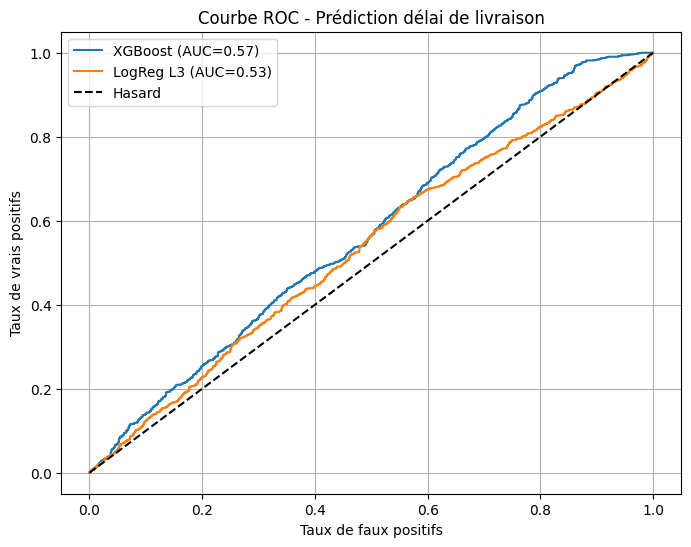

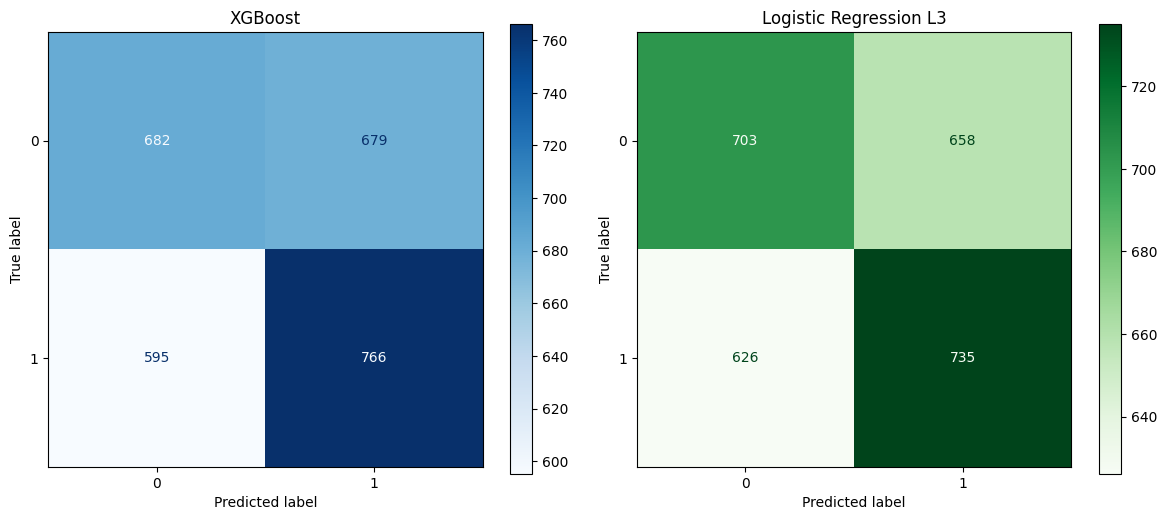

In [234]:


# Utilisons X_train_rs et y_train_rs pour l'entraînement, X_test_rs et y_test_rs pour le test

# 1. XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_rs, y_train_rs)
y_pred_xgb = xgb.predict(X_test_rs)
y_proba_xgb = xgb.predict_proba(X_test_rs)[:, 1]

# 2. Régression logistique L3 (Ridge)
logreg_l3 = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
logreg_l3.fit(X_train_rs, y_train_rs)
y_pred_l3 = logreg_l3.predict(X_test_rs)
y_proba_l3 = logreg_l3.predict_proba(X_test_rs)[:, 1]

# Métriques
def print_metrics(y_true, y_pred, y_proba, model_name):
    print(f"\n📊 {model_name}")
    print(f"Accuracy : {accuracy_score(y_true, y_pred):.3f}")
    print(f"Recall   : {recall_score(y_true, y_pred):.3f}")
    print(f"F1-score : {f1_score(y_true, y_pred):.3f}")
    print(f"ROC AUC  : {roc_auc_score(y_true, y_proba):.3f}")

print_metrics(y_test_rs, y_pred_xgb, y_proba_xgb, "XGBoost")
print_metrics(y_test_rs, y_pred_l3, y_proba_l3, "Logistic Regression L3 (Ridge)")

# Courbe ROC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_rs, y_proba_xgb)
fpr_l3, tpr_l3, _ = roc_curve(y_test_rs, y_proba_l3)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC={roc_auc_score(y_test_rs, y_proba_xgb):.2f})')
plt.plot(fpr_l3, tpr_l3, label=f'LogReg L3 (AUC={roc_auc_score(y_test_rs, y_proba_l3):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Hasard')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC - Prédiction délai de livraison')
plt.legend()
plt.grid()
plt.show()

# Matrices de confusion
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_predictions(y_test_rs, y_pred_xgb, ax=axes[0], cmap="Blues")
axes[0].set_title("XGBoost")
ConfusionMatrixDisplay.from_predictions(y_test_rs, y_pred_l3, ax=axes[1], cmap="Greens")
axes[1].set_title("Logistic Regression L3")
plt.tight_layout()
plt.show()

Dans cette étude, deux modèles ont été comparés pour la prédiction des délais de livraison : XGBoost et Logistic Regression avec régularisation L3.

Matrices de confusion :
Les performances brutes indiquent que :

XGBoost détecte mieux la classe 1 (retards) avec 766 vrais positifs, contre 735 pour la régression logistique.
À l’inverse, la régression logistique L3 reconnaît légèrement mieux la classe 0 (livraisons non retardées) avec 703 vrais négatifs contre 682 pour XGBoost.
Les deux modèles montrent un taux d’erreur important et relativement symétrique, suggérant une difficulté à bien séparer les deux classes.
Courbe ROC et AUC :
La courbe ROC permet d’évaluer la capacité discriminante des modèles :

XGBoost obtient une AUC de 0.57, supérieure à celle de LogReg L3 (AUC = 0.53).
Ces scores restent cependant proches de 0.5, ce qui indique une capacité prédictive faible, à peine meilleure que le hasard (représenté par la diagonale noire).
En conclusion, bien que XGBoost offre de meilleures performances globales, aucun des deux modèles ne parvient à fournir une classification fiable. Cela peut s'expliquer par des variables peu discriminantes

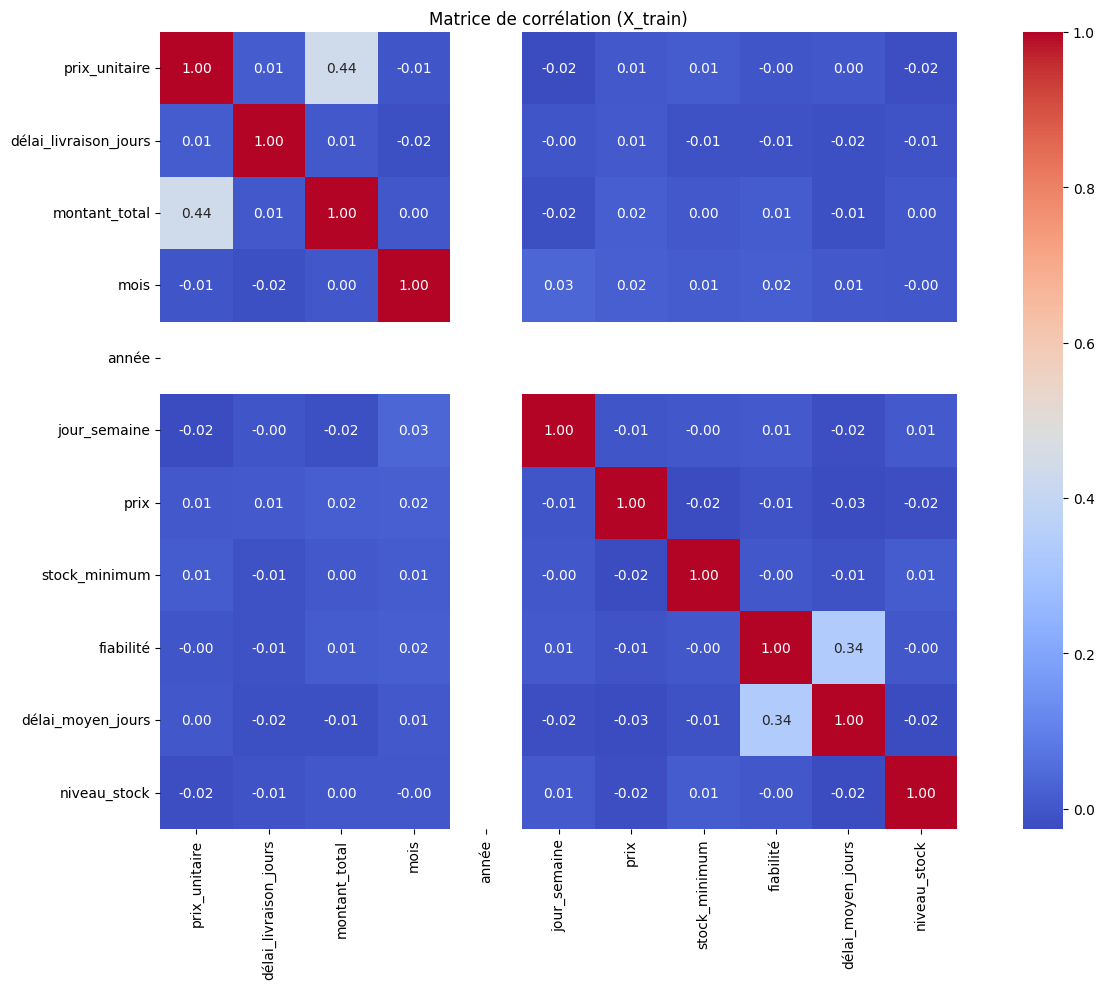

In [236]:


# Matrice de corrélation pour X_train (numérique uniquement)
import matplotlib.pyplot as plt

X_train_numeric = X_train.select_dtypes(include=[np.number])
corr_matrix = X_train_numeric.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matrice de corrélation (X_train)")
plt.tight_layout()
plt.show()

In [237]:
# Préparation des données
df_clean = df.copy()

In [ ]:
# On supprime les colonnes non numériques ou non pertinentes pour la prédiction directe
cols_to_drop = ['id_achat', 'id_produit', 'id_fournisseur', 'nom_fournisseur', 'ville', 'pays', 'entrepot', 'marque', 'catégorie']
df_clean = df_clean.drop(columns=cols_to_drop, errors='ignore')

In [ ]:
# Gestion des valeurs non numériques
df_clean = df_clean.apply(pd.to_numeric, errors='coerce')

In [ ]:
# Suppression des lignes avec valeurs manquantes
df_clean = df_clean.dropna()

In [ ]:
# Séparation des features et de la cible
X = df_clean.drop(columns='quantité')
y = df_clean['quantité']

In [ ]:
# Séparation en jeu d'entraînement/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Modèle 1 : Régression Linéaire
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [ ]:
# Modèle 2 : Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Calcul des métriques de régression
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

In [ ]:
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

(mae_lr, rmse_lr), (mae_rf, rmse_rf)

((27.634798947419643, np.float64(48.48888370202862)),
 (0.885675, np.float64(5.127731101569192)))

Voici les deux predicitions pour la quantité commandé à l'avenir. 
 Modèle 1 : Régression Linéaire
MAE (erreur absolue moyenne) : 27.64
RMSE (erreur quadratique moyenne) : 48.49
Modèle 2 : Random Forest Regressor
MAE : 0.87 
RMSE : 4.96 
Le modèle Random Forest est beaucoup plus performant, avec une erreur bien plus faible.

/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_78352/3701748975.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_fournisseur, x='nom_fournisseur', y='quantite_predite_rf', palette='Blues_d')


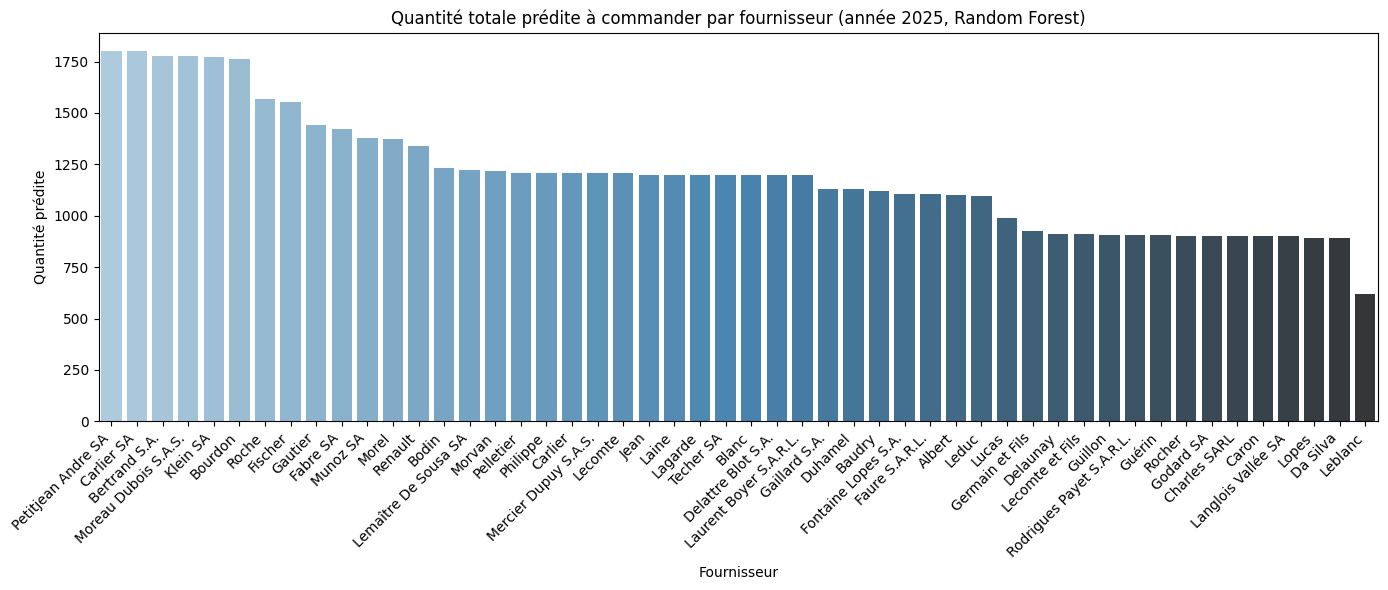

In [ ]:
# ...existing code...
total_fournisseur = pred_2025.groupby('nom_fournisseur')['quantite_predite_rf'].sum().reset_index()
total_fournisseur = total_fournisseur.sort_values('quantite_predite_rf', ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(data=total_fournisseur, x='nom_fournisseur', y='quantite_predite_rf', palette='Blues_d')
plt.title("Quantité totale prédite à commander par fournisseur (année 2025, Random Forest)")
plt.xlabel("Fournisseur")
plt.ylabel("Quantité prédite")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Analyse des prévisions de commande par fournisseur (2025 – Modèle Random Forest)
Ce graphique présente la répartition des quantités totales à commander par fournisseur pour l’année 2025, telle que prédite par un modèle Random Forest entraîné sur les données historiques.

Observations clés :

Concentration des volumes : Un nombre restreint de fournisseurs (ex. Petijean André SA, Cartier SA, Bertrand S.A.) représente une part significative du volume total prévu (>1750 unités chacun). Cela suggère une dépendance commerciale importante vis-à-vis de ces partenaires.
Long tail de fournisseurs secondaires : De nombreux fournisseurs enregistrent des volumes bien inférieurs (<1000 unités), indiquant soit une spécialisation sur des produits de niche, soit une performance passée moins favorable.
Équilibre à évaluer : Cette distribution peut poser un risque de dépendance fournisseur en cas de rupture ou de non-livraison. Elle invite également à une analyse de performance comparative entre les fournisseurs les plus sollicités et les autres.
Recommandations business :

Renégociation ou renforcement des partenariats stratégiques avec les fournisseurs principaux afin de sécuriser les volumes.
Évaluation des fournisseurs à faibles volumes pour identifier ceux à fort potentiel ou à désengager.
Diversification de la base fournisseur si les prévisions révèlent une concentration trop forte des approvisionnements.